In [37]:
import os
import pandas as pd
import config
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from scipy.stats import linregress
from scipy.signal import savgol_filter
from scipy.signal import savgol_filter
from datetime import datetime, timedelta
import pickle
import pdb
import seaborn as sns

In [119]:
# LOAD DATA
with open('sfn_stuff\\x+n results\\ridge_correlation_results.pkl', 'rb') as f:
    rr_corr_results = pickle.load(f)

with open('sfn_stuff\\x+n results\\lstm_correlation_results.pkl', 'rb') as f:
    lstm_corr_results = pickle.load(f)

In [120]:
def reformat_into_df(data):
    df_prep = {
        'num_training_days':[],
        'testing_day':[],
        'mean':[],
        'std':[]
    }   
    for training_days in data['sessions_means'].keys():
        for testing_days in data['sessions_means'][training_days].keys():
            df_prep['num_training_days'].append(training_days)
            df_prep['testing_day'].append(testing_days)
            df_prep['mean'].append(data['sessions_means'][training_days][testing_days])
            df_prep['std'].append(data['sessions_stds'][training_days][testing_days])
    df = pd.DataFrame.from_dict(df_prep)

    #hardcoded but it is what is is
    dodge_amounts = 0.1 * np.tile(np.asarray([-2,-1,0,1,2]), 10)
    df['num_training_days_dodged'] = df['num_training_days'] + dodge_amounts
    return df


In [121]:
rr_df = reformat_into_df(rr_corr_results)
lstm_df = reformat_into_df(lstm_corr_results)

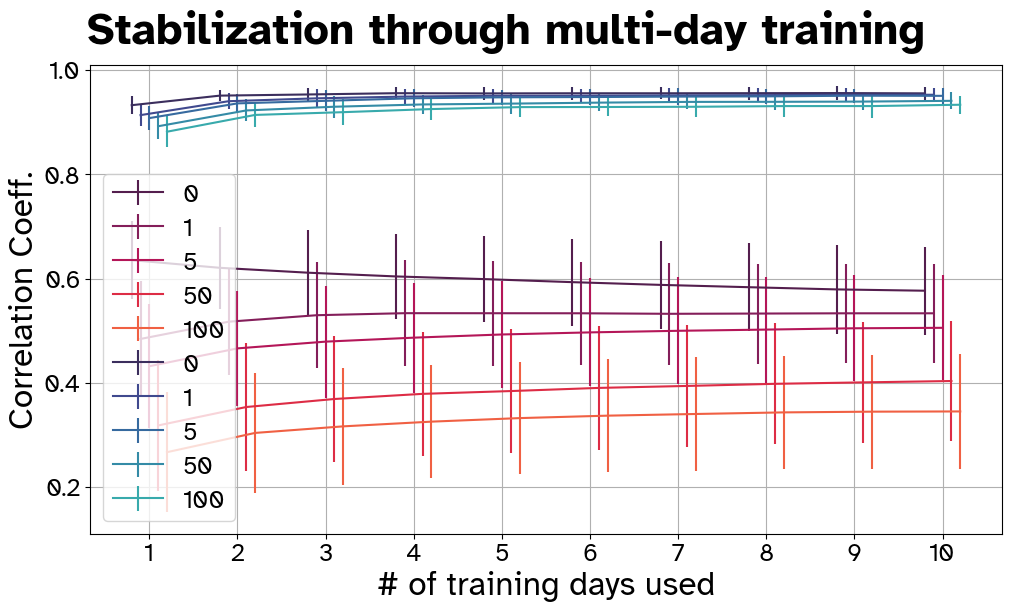

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,6), sharex=True, sharey=True)
# sns.lineplot(rr_df, x='num_training_days_dodged', y='mean', hue='testing_day', ax=ax[0])
# sns.lineplot(lstm_df, x='num_training_days_dodged', y='mean', hue='testing_day', ax=ax[1])


# custom error bar
rr_c = sns.color_palette('rocket', as_cmap=True)(np.linspace(0,1,10))[2:7,:]
lstm_c = sns.color_palette('mako', as_cmap=True)(np.linspace(0,1,10))[2:7,:]
def make_perf_plot(data, ax, colors):
    for i, (test_day, group) in enumerate(data.groupby('testing_day')):
        ax.errorbar(group['num_training_days_dodged'], group['mean'], group['std'], c=colors[i], label=test_day)
    ax.grid(True)
    ax.set(xticks=(1,2,3,4,5,6,7,8,9,10), xlabel='# of training days used')
    ax.legend()

ax.set(ylabel='Correlation Coeff.')
make_perf_plot(rr_df, ax, rr_c)
make_perf_plot(lstm_df, ax, lstm_c)
fig.suptitle('Stabilization through multi-day training')
fig.savefig(os.path.join(config.characterizationdir, "stbailization_multiday.pdf"))